In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import xlwings as xw

In [2]:
book = xw.Book()
sheet1 = book.sheets[0]

In [4]:
sheet1['A1'].value = [[1, 2], [3, 4]]

In [5]:
# Horizontal range (1-dimensional)
sheet1['A1:B1'].value

[1.0, 2.0]

In [6]:
# Vertical range (1-dimensional)
sheet1['A1:A2'].value

[1.0, 3.0]

In [7]:
# Horizontal range (2-dimensional)
sheet1['A1:B1'].options(ndim=2).value

[[1.0, 2.0]]

In [8]:
# Vertical range (2-dimensional)
sheet1['A1:A2'].options(ndim=2).value

[[1.0], [3.0]]

In [10]:
# Using the NumPy array converter behaves the same:
# vertical range leads to a 1-dimensional array
sheet1['A1:A2'].options(np.array).value

array([1., 3.])

In [11]:
# Preserving the column orientation
sheet1['A1:A2'].options(np.array, ndim=2).value

array([[1.],
       [3.]])

In [12]:
# If we need to write out a list vertically,
# the 'transpose' option comes in handy
sheet1['D1'].options(transpose=True).value = [100, 200]

In [14]:
# Write out some sample data
sheet1['A13'].value = [dt.datetime(2020, 1, 1), None, 1.0]

In [15]:
# Read it back using the default options
sheet1['A13:C13'].value

[datetime.datetime(2020, 1, 1, 0, 0), None, 1.0]

In [16]:
# Read it back using non-default options
sheet1['A13:C13'].options(empty='NA', dates=dt.date, numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

## Add charts in Excel

In [17]:
sheet1['A15'].value = [[None, 'North', 'South'],
                       ['Last Year', 2, 5],
                       ['This Year', 3, 6]]

In [18]:
chart = sheet1.charts.add(top=sheet1['A19'].top,
                          left=sheet1['A19'].left)

chart.chart_type = 'column_clustered'
chart.set_source_data(sheet1['A15'].expand())

## Embedded images from Matplotlib

In [19]:
# Read in the chart data as DataFrame
df = sheet1['A15'].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [20]:
# Enable Matplotlib by using the notebook magic command
# and switch to the "seaborn" style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/2k/fztkts0j2yl603hc8vbyrf540000gn/T/ipykernel_53436/1692430890.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


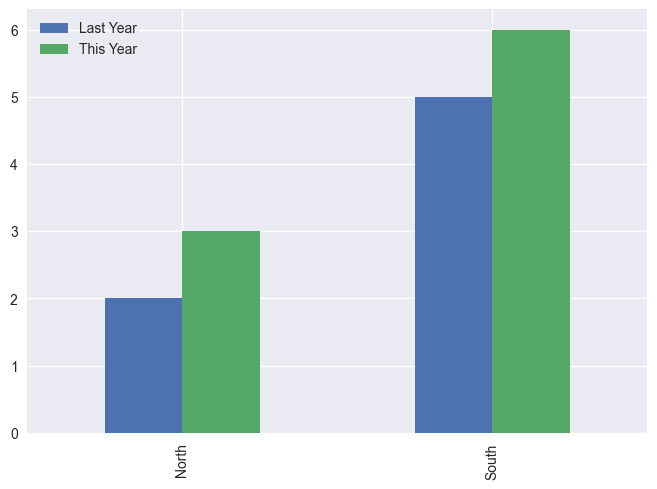

In [21]:
# The pandas plot method returns an "axis" object from
# where you can get the figure. "T" transposes the 
# DataFrame to bring the plot into the desired orientation
ax = df.T.plot.bar()
fig = ax.get_figure()

In [23]:
# Send the plot to Excel
plot = sheet1.pictures.add(fig, name="SalesPlot", top=sheet1['H19'].top, left=sheet1['H19'].left)

# Let's scale the plot to 70%
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [24]:
# update plot
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

## Defined Names

In [26]:
book = xw.Book()
sheet1 = book.sheets[0]

In [27]:
# The book scope is the default scope
sheet1['A1:B2'].name = 'matrix1'

In [28]:
# For the sheet scope, prepend the sheet name with an exclamation point
sheet1["B10:E11"].name = "Sheet1!matrix2"

In [29]:
# Access the range by name
sheet1['matrix1']

<Range [Book1]Sheet1!$A$1:$B$2>

In [30]:
# If accessing the names collection via the 'sheet1' object, it contains only names with the sheet's scope
sheet1.names

[<Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [31]:
# If accessing the names collection via the 'book' object, it contains all names, including book and sheet scope
book.names

[<Name 'matrix1': =Sheet1!$A$1:$B$2>, <Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [32]:
# Names have various methods and attributes
# Get the respective range object
book.names['matrix1'].refers_to_range

<Range [Book1]Sheet1!$A$1:$B$2>

In [33]:
# Assigning a name to a constant or a formula, use the 'add' method
book.names.add('EURUSD', '=1.1151')

<Name 'EURUSD': =1.1151>